In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
turnover = pd.read_csv("../data/turnover.csv")
turnover['salary'].value_counts()
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# converting salary into categories
turnover["salary"] = turnover["salary"].astype('category').cat.reorder_categories(['low', 'medium', 'high']).cat.codes

In [4]:
turnover.salary.value_counts()
turnover.rename(columns={'sales': 'department'}, inplace=True)
turnover.head()
turnover['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [39]:
# converting department into dummies
department = pd.get_dummies(turnover["department"])
department.head()



KeyError: 'department'

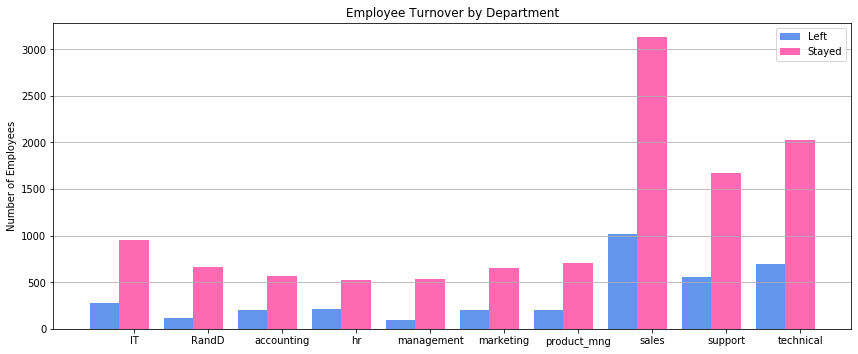

In [31]:
import numpy as np
# turnover = turnover.drop(["department"], axis=1)
turnover.head()
# turnover = turnover.join(department)
turnover.head()
employee_turnvover = turnover.groupby('left').sum()
employee_turnvover.head()
# employee_turnvover.columns
labels = ['IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical']
# side by side bar chart
stayed = employee_turnvover.iloc[0,8:].values
left = employee_turnvover.iloc[1,8:].values

fig, ax = plt.subplots(figsize=(12,5))
width = 0.4
xlocs = np.arange(len(left))
ax.bar(xlocs-width, left, width, color='cornflowerblue', label='Left')
ax.bar(xlocs, stayed, width, color='hotpink', label='Stayed')

ax.set_xticks(ticks=range(len(left)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of Employees')
ax.set_title('Employee Turnover by Department')
fig.tight_layout(pad=1)

In [41]:

# by_department
y = turnover['left']
dep_X = department


# turnover.corr()
# pd.plotting.scatter_matrix(turnover, figsize=(15,15));

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [ ]:
# plotting the correlation matrix
# as seaborn is based on matplotlib, we need to use plt.show() to see the plot
sns.heatmap(turnover.corr())
plt.show()

In [ ]:
turnover.info()

In [ ]:
turnover.describe()

In [ ]:
# joining the departments
# turnover = turnover.join(department)
# turnover.head()


In [ ]:
# the percentage of leavers

turnover['left'].value_counts()/len(turnover)

In [ ]:
turnover['left'].value_counts()

In [ ]:
columns = ['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary']
turnover[columns]

In [ ]:
turnover.Work_accident.value_counts()

In [ ]:
top_feat = ['satisfaction_level', 'time_spend_company']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

gdbr = GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=100, random_state=1)

abr = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=0.1,
                         n_estimators=100, random_state=1)

In [ ]:

# y = turnover.pop('left').values
y = y
X = turnover[top_feat].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10 # number of folds in the cross-validation 
print(cross_val_score(rf, X_train, y_train, cv=k))
print(cross_val_score(gdbr, X_train, y_train, cv=k))
print(cross_val_score(abr, X_train, y_train, cv=k));

In [ ]:
import numpy as np
np.unique(y)

In [ ]:
# y_train
turnover.columns

In [ ]:
columns = 
for feat in columns:
    turnover.plot.scatter(x=feat, y='left')

In [ ]:
turnover['satisfaction_level'].value_counts()
# turnover['satisfaction_level'].hist();
# sum(turnover['satisfaction_level']

In [ ]:
# turnover = turnover.join(department)